In [15]:
import pandas as pd
from lifetimes.utils import calibration_and_holdout_data
from lifetimes import GammaGammaFitter
from lifetimes import BetaGeoFitter
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
# read source data file
transactions = pd.read_csv(r"C:\Users\adepup\Documents\Prav-Development\Research\github\customer_loyalty\data\Retail_Data_Transactions.csv")

In [3]:
transactions['trans_date'] = pd.to_datetime(transactions['trans_date'])
transactions = transactions.sort_values(by='trans_date')
transactions.head(10)

,customer_id,trans_date,tran_amount
56171,CS3366,2011-05-16,77
77394,CS4165,2011-05-16,97
2548,CS1849,2011-05-16,79
57968,CS4432,2011-05-16,41
80045,CS5573,2011-05-16,93
61270,CS3983,2011-05-16,87
28695,CS2363,2011-05-16,42
19024,CS6034,2011-05-16,87
75646,CS3692,2011-05-16,63
101016,CS7445,2011-05-16,59


In [6]:
transactions = transactions[transactions["trans_date"]<="2012-05-16"]

In [9]:
transactions_holdout = calibration_and_holdout_data(transactions, 
                                                            'customer_id', 
                                                            'trans_date',
                                                            calibration_period_end = "2012-02-16",
                                                            observation_period_end = "2012-05-16"
                                                           )

In [10]:
transactions_holdout.head(10)

,frequency_cal,recency_cal,T_cal,frequency_holdout,duration_holdout
customer_id,,,,,
CS1112,2.0,109.0,246.0,1.0,90
CS1113,2.0,149.0,265.0,1.0,90
CS1114,4.0,67.0,217.0,1.0,90
CS1115,4.0,186.0,190.0,3.0,90
CS1116,4.0,232.0,234.0,1.0,90
CS1117,4.0,255.0,272.0,1.0,90
CS1118,1.0,119.0,274.0,1.0,90
CS1120,5.0,257.0,266.0,2.0,90
CS1121,5.0,259.0,262.0,3.0,90


In [14]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(transactions_holdout[["frequency_cal"]])
    Sum_of_squared_distances.append(km.inertia_) # can also use silhouette co-efficient

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (12) found smaller than n_clusters (13). Possibly due to duplicate points in X.
  return_n_iter=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (12) found smaller than n_clusters (14). Possibly due to duplicate points in X.
  return_n_iter=True)


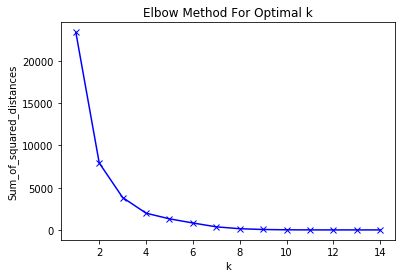

In [16]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
"""
Elbow - From data, we can either take 4 or 6 clusters for better segmentation
      - However, we are going to take k=2 to segment customers into 2 clusters, Loyal customers & Non loyal customers
"""